In [1]:
%matplotlib inline
%precision 7
import nflgame
import numpy
import pandas
import repoze.lru
import matplotlib.pyplot as plt

# Applied Math Senior Seminar Project - Mathematics and Fantasy Football
<h3 align="center">By Anshul Doshi</h3> 

## Table of Contents

1. **What is Fantasy Football?**
    - How the game of football works
    - History and background of Fantasy Football
    - Drafting players and Strategy
    - Season vs. Daily Fantasy

2. **Defining the Problem** 

3. **An Initial Model** 
    - Central Limit Theorem and scores
    - Getting acquainted with python package and data
    - Creating rankings

4. **Gaussian Mixture Model**
    - EM algorithm 
    - Bayesian Information Criterion
    - Creating Tiers

5. **Linear Regression**
    - Features and Labels
    - A simple example
    - Adding more features and dimensions

6. **Daily Fantasy - An Optimization Problem**

7. **Conclusion**

8. **Future & Questions**

## Primary Resources

**Initial Model**
   - Rome, Scott. "Making Fantasy Football Projections Via A Monte Carlo Simulation.", 05 Sept. 2016. Web. 28 Nov. 2016.

**Gaussian Mixture Model**
- Chen, Boris. "Drafting a Fantasy Football Team, With Help From Advanced Statistics." New York Times., 04 Aug. 2014. Web. 15 Oct. 2016.
- Chen, Boris. "Fantasy Football Tiers." Data, Math, Etc. Web. 28 Nov. 2016. <http://www.borischen.co/>.
- Kwik, Huey. "Using Data Science to Win in Fantasy Football." Medium. 21 June 2016. Web. 28 Nov. 2016

**BIC and EM Algorithm**
- Schwarz, Gideon E. (1978), "Estimating the dimension of a model", Annals of Statistics, 6 (2): 461–464, 
- Dempster, A.P.; Laird, N.M.; Rubin, D.B. (1977). "Maximum Likelihood from Incomplete Data via the EM Algorithm". Journal of the Royal Statistical Society, Series B. 39 (1): 1–38. 

**Linear Regression**
- Bookman, Matt. "Predicting Fantasy Football - Truth in Data." Stanford Computer Science (2012): 14 Dec. 2012. Web. 2 Nov. 2016.
- Kapania, Nitin. "Predicting Fantasy Football Performance with Machine Learning Techniques." Stanford Computer Science (2012): Stanford. Web. 3 Nov. 2016.
- Lutz, Roman. "Fantasy Football Prediction." 26 May 2015. Web.
- Steenkiste, Paul. "Finding the Optimal Fantasy Football Team." Stanford Computer Science (2015): 11 Dec. 2015. Web. 7 Nov. 2016.
- Hastie, Trevor, Robert Tibshirani, and J. H. Friedman. The Elements of Statistical Learning: Data Mining, Inference, and Prediction: With 200 Full-color Illustrations. New York: Springer, 2001. Print. 
- Ng, Andrew. "CS229 - Machine Learning." Stanford Engineering Everywhere. Web. 01 Dec. 2016.

**Daily Fantasy and Optimization**
- Blanc, Mitch, Jake Lessie, and Matt Smith. "Optimization of a FanDuel Salary Cap League Fantasy Football Team." Brigham Young University (2016): Web. 28 Nov. 2016.
- Brady, Sam. "Solving the "Fantasy Football Knapsack Problem"¶." Knapsack. Web. 05 Dec. 2016.

**Data**
- Gallant, Andrew. "nflgame." Github. "BurntSushi", Web. 1 Oct. 2016.
- "Fantasy Football Rankings - Week 13 (2016)." Week 13 QB Rankings, QB Cheat Sheets, QB Week 13 Fantasy Football Rankings. 28 Nov. 2016. Web. 05 Dec. 2016.
- "Weekly Football Points." RotoGuru. Web. 05 Dec. 2016.

**Other**
- Lotter, Bill. "Extending the NFL Season to a Million Games." Harvard Sports Analysis. The Harvard College Sports Analysis Collective, 2 June 2015. Web. 12 Nov. 2016.
- "The Lucrative and Growing Fantasy Football Industry - Sports Management Degree Hub." Sports Management Degree Hub.  Web. 05 Dec. 2016.
- Duley, Naranker. "Genetic Algorithms." Introduction to Genetic Algorithms. Web. 05 Dec. 2016.

## Introduction

Today we will be exploring the game of fantasy football and different ways we can go about ranking players. To understand fantasy football - it is first important to know the basics about how football works.

### Basics of Football

Teams are split into offense and defense. For the purposes of fantasy, only offensive players are relevant. 

**The Field**
- 100 yard long field
- Markings every 10 yards
- Goal is to drive the ball from one side to the other

**The Players**
- Quarterback
- Running Back
- Wide Receiver
- Tight End
- Kicker

**Moving the ball**
- Offense can either run or pass
- goal is to get 10 yards within your four downs

**How to win**
- Team with most points wins
- Scoring points by catching ball in the end zone or running it in the end zone (6 points)
- Score by kicking field goals (3 points)

### History and Backgorund of Fantasy Football

- Wilfred "Bill the Gill" Winkenbach (1962)
- Industry Stats
    - 57 million players playing fantasy sports (2015)
    - 40 million of those playing fantasy football
    - Rise of Daily Fantasy has made fantasy football a fast-growing industry worth billions
    
<a href="http://www.sportsmanagementdegreehub.com/fantasy-football-industry/"><img src="http://www.sportsmanagementdegreehub.com/wp-content/uploads/2015/10/Fantasy-football.jpg" alt="Fantasy Football" width="500" border="0"/></a><br/>Source: <a href="http://www.sportsmanagementdegreehub.com/">SportsManagementDegreeHub.com</a>

### How does it work

**Season Long Leagues**
- Before a season starts, you draft a team.
    - Each player goes in order selecting from list of available players
    - By the end, your team has players that from different nfl-teams.
- Drafting is very important - you are stuck with these players for an entire season

**The waiver wire**
- This is a list of available players that you can pick up by dropping your own player. 

**Head-to-Head Matchups**
- Each week you go up against another league member with your drafted team
- Decisions must be made on which players to start as your roster has bench spots.

### Scoring

We will using the following scoring system:

- 25 passing yards = 1 point
- passing tds = 4 points
- 10 rushing yards = 1 point
- rushing tds = 6 points
- reception = .5 points
- 10 receiving yards = 1 point
- fumbles and interceptions = -2 points

I won't really be going into kicker and defense scoring in this lecture. 

## Drafting

For season-long leagues, drafting is one of the most important part of the game. We will be drafting players from various teams, filling our roster with usually 1 QB, 2 RB, 2 WR, 1 Flex, 1 D/ST, 1 Kicker and 5-6 Bench players. There are mulitple things to consider when drafting each position - how have players performed in the past, who is more durable/less injury prone, suspensions etc... 

**Goal: ** Before any games in a given year are played, we want to be able to use data from any number of years from the past and be able to create an optimal team. Ideally, this would mean ranking each player by position.  

In [2]:
games = nflgame.games(2016, [1,2,3], 'LA')
players = nflgame.combine_game_stats(games)
for p in players.rushing().sort('rushing_yds').limit(5):
    msg = '%s %d carries for %d yards and %d TDs'
    print msg % (p, p.rushing_att, p.rushing_yds, p.rushing_tds)

C.Michael 10 carries for 60 yards and 0 TDs
T.Gurley 19 carries for 51 yards and 0 TDs
R.Wilson 5 carries for 14 yards and 0 TDs
T.Austin 2 carries for 6 yards and 0 TDs
C.Keenum 3 carries for 5 yards and 0 TDs


## Part I - An Initial Model - Monte Carlo Simulation

Assume that we have already drafted a team. Now we want to see how that team will do across a season. Thus, our goal is to project a team's total score. Thus, using our denomination before, we can think of our total score as a sum of random variables such that:

$$X = X_{qb} + X_{rb1} + X_{rb2} + X_{wr1} + X_{wr2} + X_{flex} + X_{D/ST} + X_{k}$$

We can get each player level score by sampling from historical games - say 2013-2015 seasons to keep data relevant.
We will also put different sampling weights on these years since a more recent performance should have a larger influence on a projected score than a performance two years ago. 

**Central Limit Theorem**

By defining our total score as a sum of random variables, we can now use the central limit theorem to say that this score will approximately be normally distributed.

Lets see how this would look in code:

In [3]:
scoring = {
    'passing_yds' : lambda x : x*.04,
    'passing_tds' : lambda x : x*4., 
    'passing_ints' : lambda x : -2.*x,
    'rushing_yds' : lambda x : x*.1,
    'rushing_tds' : lambda x : x*6.,
    'kickret_tds' : lambda x : x*6.,
    'receiving_tds' : lambda x : x*6.,
    'receiving_yds' : lambda x : x*.1,
    'receiving_rec' : lambda x : .5*x,
    'fumbles_lost' : lambda x : -2.*x,
    'passing_twoptm'  : lambda x : 2.*x,
    'rushing_twoptm' : lambda x : 2.*x,
    'receiving_twoptm' : lambda x : 2.*x
}

def score_player(player):
    score = 0 
    for stat in player._stats:
        if stat in scoring:
            score += scoring[stat](getattr(player,stat)) 
    return round(score,1)

def print_all_fantasy_scores(game_year, game_week):
    games = nflgame.games(game_year, week=game_week)
    players = nflgame.combine_game_stats(games)
    fantasy_scores = []
    for p in players:
        fantasy_scores.append([str(p.name), score_player(p)])
    fantasy_scores = sorted(fantasy_scores, key=lambda x: x[1])
    for n in xrange(len(fantasy_scores)-1, -1, -1):
        if fantasy_scores[n][1] != 0.0:
            print fantasy_scores[n]

print_all_fantasy_scores(2016, 12)

['C.Kaepernick', 33.1]
['D.Brees', 32.5]
['K.Cousins', 30.2]
['A.Brown', 29.6]
['M.Ingram', 29.2]
['T.Siemian', 29.0]
['L.McCoy', 28.4]
['T.Hill', 28.0]
['M.Thomas', 27.3]
['R.Tannehill', 26.8]
['J.Reed', 26.5]
['M.Evans', 26.4]
['D.Johnson', 26.1]
['D.Adams', 25.8]
['E.Sanders', 25.7]
['E.Elliott', 25.0]
['O.Beckham', 24.6]
['T.Gabriel', 24.2]
['A.Rodgers', 23.1]
['M.Wilson', 22.5]
['L.Bell', 22.2]
['D.Prescott', 21.7]
['J.Stewart', 21.6]
['M.Mariota', 21.6]
['B.Bortles', 21.1]
['D.Inman', 20.9]
['T.Ginn', 20.8]
['B.Roethlisberger', 20.8]
['D.Freeman', 20.7]
['M.Barkley', 20.6]
['C.Newton', 20.4]
['T.Taylor', 20.4]
['D.Jackson', 19.8]
['P.Rivers', 19.7]
['E.Manning', 19.6]
['Q.Enunwa', 19.4]
['T.Brady', 19.0]
['M.Mitchell', 18.7]
['M.Ryan', 18.3]
['C.Hyde', 18.0]
['C.Palmer', 17.6]
['C.Wentz', 17.5]
['T.Hightower', 17.5]
['D.Carr', 17.3]
['Ty.Williams', 17.0]
['R.Fitzpatrick', 16.9]
['J.Goff', 16.6]
['A.Boldin', 16.4]
['L.Murray', 16.3]
['M.Stafford', 16.3]
['T.Pryor Sr.', 16.1]
['J.W

In [4]:
my_team = ['Philip Rivers', 
        'Le\'Veon Bell', 
        'Demarco Murray', 
        'Kelvin Benjamin',
        'Larry Fitzgerald',
         'Tyler Eifert',
         'Dez Bryant', ]

def make_team(team):
    tm = []
    for p in team:
        for plr in nflgame.find(p):
            if plr.position not in set(['QB','WR','TE','RB', 'K']) or plr.status == '':
                continue
            tm.append(plr)
    return tm

def validate_team(team):
    for t in team:
        print(str(t.full_name), str(t.team))

from repoze.lru import lru_cache     
@lru_cache(200) # Define a cache with 200 empty slots
def get_games(year,week=None):
    g = nflgame.games(year,week=week)
    return nflgame.combine_game_stats(g)

@lru_cache(200) # Define a cache with 200 empty slots
def get_plays_by_year(year):
    g = nflgame.games(year)
    return nflgame.combine_play_stats(g)

tm = make_team(my_team)
validate_team(tm)

('Philip Rivers', 'SD')
("Le'Veon Bell", 'PIT')
('DeMarco Murray', 'TEN')
('Kelvin Benjamin', 'CAR')
('Larry Fitzgerald', 'ARI')
('Tyler Eifert', 'CIN')
('Dez Bryant', 'DAL')


Now that we have set up a team, we can simulate the score for a single player. 

In [5]:
def get_score_for_player(player):
    #Sample the year and week
    year = numpy.random.choice([2014, 2015, 2016], p=[.2, .3, .5])
    if year == 2016:
        week = numpy.random.randint(1,13)
    else:
        week = numpy.random.randint(1,18)
    
    for p in get_games(year, week):
        if p.player == None:
            continue
        if player == p.player:
            return score_player(p)
    return get_score_for_player(player)

def simulate(team, exps=1000):
    scores = pandas.DataFrame(data=numpy.zeros((exps,len(team))),
                          columns = [p.name for p in team])
    for n in range(exps):
        for player in team:
            scores.loc[n,player.name] += get_score_for_player(player)
    #print scores
    return scores

tm = make_team(my_team)
validate_team(tm)

outcome = simulate(tm, exps=100)
#print outcome
outcome.head()

game_points = outcome.sum(axis=1, skipna=True) # Sum the player scores together
#print game_points

print('Team projection: %s' % game_points.mean())
print('Standard Deviations: %s' % (game_points.std()/numpy.sqrt(len(outcome.columns))))

('Philip Rivers', 'SD')
("Le'Veon Bell", 'PIT')
('DeMarco Murray', 'TEN')
('Kelvin Benjamin', 'CAR')
('Larry Fitzgerald', 'ARI')
('Tyler Eifert', 'CIN')
('Dez Bryant', 'DAL')
Team projection: 103.356
Standard Deviations: 6.70481363124


In [6]:
outcome.mean()

Philip Rivers       18.201
Le'Veon Bell        20.567
DeMarco Murray      17.373
Kelvin Benjamin     12.248
Larry Fitzgerald    11.984
Tyler Eifert        11.254
Dez Bryant          11.729
dtype: float64

In [7]:
outcome.std()

Philip Rivers       6.409880
Le'Veon Bell        7.003939
DeMarco Murray      6.715666
Kelvin Benjamin     5.616902
Larry Fitzgerald    6.753641
Tyler Eifert        7.705585
Dez Bryant          6.898723
dtype: float64

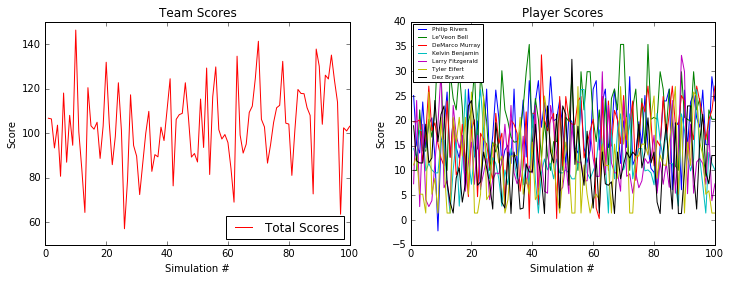

In [8]:
#Plotting the above data
x = numpy.linspace(1.0, 100.0, 100.0)

fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)
axes = fig.add_subplot(1,2,1)

axes.plot(x, game_points.as_matrix(), 'r', label='Total Scores')

axes.set_xlabel("Simulation #")
axes.set_ylabel("Score")
axes.set_title("Team Scores")
#axes.set_ylim(80, 120)
plt.legend(loc='best')

axes = fig.add_subplot(1,2,2)

for player in tm:
    #print outcome[player.name].as_matrix()
    axes.plot(x, outcome[player.name].as_matrix(), label=player.name)

axes.set_xlabel("Simulation #")
axes.set_ylabel("Score")
axes.set_title("Player Scores")
#axes.set_ylim(80, 120)
plt.legend(loc='best', fontsize='xx-small')
plt.show()


**Summary**

Our initial model here is pretty naive and simplistic. All we did is use the ideas of central limit theorem and simulate a bunch of games by sampling from past data of each player. Then, we summed up all these scores and took the mean and standard deviation as our projection for player scores. 

However, football is much more complicated than that. Our assumption that each game just produces a random score for each player is not necessarily true as there are many more factors involved. For example - a players outlook could change based on how good of a defense he is playing. There are things like weather, injuries and matchup that we havent considered. 

Moreover, while we have created projected points - it may be more useful for fantasy purposes to see scoring relative to other players. Using this model, lets come up with ranks.

In [9]:
#Lets look at the top 150 fantasy scorers in 2015
weeks = list(range(1,16))
fantasy_scores = []
for wk in weeks:
    players = get_games(2015, wk)
    dict_scores = dict()
    for plr in players:
        if plr in dict_scores:
            dict_scores[plr] += score_player(plr)
        else:
            dict_scores[plr] = score_player(plr)
for key, value in dict_scores.iteritems():
    temp = [key, value]
    fantasy_scores.append(temp)
fantasy_scores = sorted(fantasy_scores, key=lambda x: x[1], reverse=True)
top_150 = []
for n in xrange(150):
    #print fantasy_scores[n][0].position
    top_150.append(fantasy_scores[n][0])

#Split into 4 lists based on position
qbs = []
rbs = []
wrs = []
tes = []

for plr in top_150:
    if plr.player.position == 'QB':
        qbs.append(plr.player)
    elif plr.player.position == 'RB':
        rbs.append(plr.player)
    elif plr.player.position == 'WR':
        wrs.append(plr.player)
    elif plr.player.position == 'TE':
        tes.append(plr.player)
    
outcome = simulate(qbs, 100)
qb_rankings = outcome.mean().sort_values(ascending=False)

outcome = simulate(rbs, 100)
rb_rankings = outcome.mean().sort_values(ascending=False)

outcome = simulate(wrs, 100)
wr_rankings = outcome.mean().sort_values(ascending=False)

outcome = simulate(tes, 100)
te_rankings = outcome.mean().sort_values(ascending=False)

qb_rankings = pandas.DataFrame(data = qb_rankings.index.values)
rb_rankings = pandas.DataFrame(data = rb_rankings.index.values)
wr_rankings = pandas.DataFrame(data = wr_rankings.index.values)
te_rankings = pandas.DataFrame(data = te_rankings.index.values)

full_rankings = pandas.concat([qb_rankings, rb_rankings, wr_rankings, te_rankings], axis=1)
col_names = ['QB Rankings', 'RB Rankings', 'WR Rankings', 'TE Rankings']

full_rankings.columns = col_names
pandas.set_option('display.width', 1000)
print full_rankings

           QB Rankings          RB Rankings           WR Rankings              TE Rankings
0           Drew Brees        David Johnson         Antonio Brown           Rob Gronkowski
1            Tom Brady      Devonta Freeman           Julio Jones              Jordan Reed
2        Aaron Rodgers      Adrian Peterson         Odell Beckham               Greg Olsen
3           Cam Newton           Matt Forte            Mike Evans           Delanie Walker
4   Ben Roethlisberger      Latavius Murray         Brandin Cooks             Travis Kelce
5            Matt Ryan            Jay Ajayi      Demaryius Thomas            Antonio Gates
6         Kirk Cousins          Todd Gurley       DeAndre Hopkins               Eric Ebron
7       Russell Wilson           Frank Gore      Emmanuel Sanders              Zach Miller
8        Blake Bortles          Doug Martin          Amari Cooper            Gary Barnidge
9           Derek Carr          Jeremy Hill            Dez Bryant             Jason Witten

## Part II - Other Models to Rank Players

There are many ways in which models are created to rank players. Lets take a look at some common practices in fantasy football used by well-known sites. Many models are propietary and require a subscription but here we take a look at some examples. 

### Gaussian Mixture Model - Boris Chen

Lets continue with this theme of assuming that player's fantasy scores come from a normal distribution. Of course, there are drawbacks of this assumption as it takes nothing about the game into account, we still can get some powerful rankings.

Here, I will try to recreate weekly findings from Boris Chen's blog in which he implements a Gaussian Mixture Model to create tiered rankings of players. 

**Methodology**

Here we will look at expert rankings from various websites across the industry. These rankings come from various methodolgies, whether it is statistically based or just intuition. 

Tom Brady


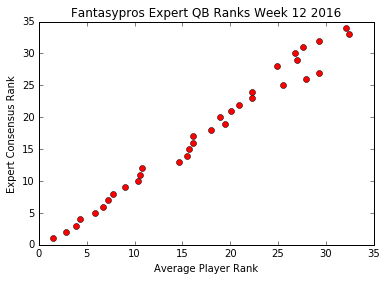

34


In [10]:
fileName = 'FantasyPros_2016_Week_12_QB_Rankings.csv'
rankings_12 = pandas.read_csv(fileName)

#print rankings_12

consensus_rank = rankings_12.as_matrix([rankings_12.columns[0]])
avg_rank = rankings_12.as_matrix([rankings_12.columns[6]])
player_name = rankings_12.as_matrix([rankings_12.columns[1]]) 

print player_name[0][0]

fig = plt.figure()
axes = fig.add_subplot(1,1,1)

axes.plot(avg_rank,consensus_rank,'ro')
axes.set_title("Fantasypros Expert QB Ranks Week 12 2016")
axes.set_xlabel("Average Player Rank")
axes.set_ylabel("Expert Consensus Rank")


plt.show()

print avg_rank.shape[0]
rank_data = numpy.empty((avg_rank.shape[0],2)) 
for n in xrange(avg_rank.shape[0]):
    rank_data[n] = [avg_rank[n], consensus_rank[n]]
#print rank_data

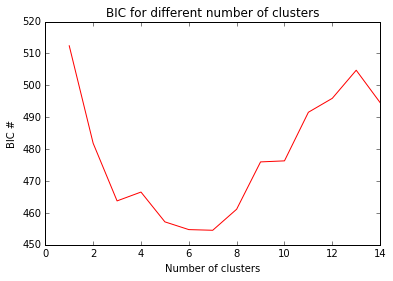

Minimum BIC - Number of Clusters will be:  7


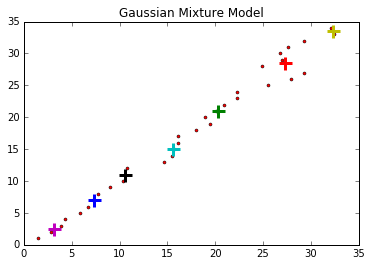

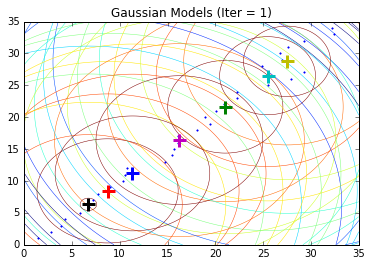

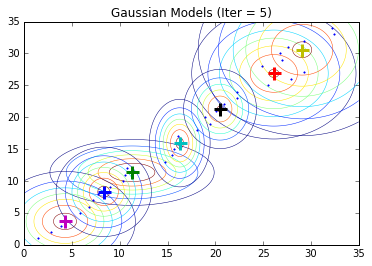

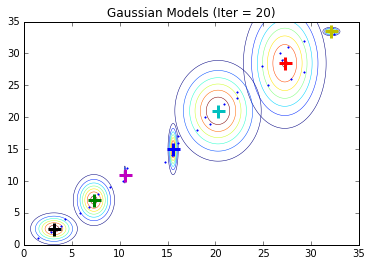

Tier 1:  ['Tom Brady', 'Drew Brees', 'Aaron Rodgers', 'Russell Wilson']
Tier 2:  ['Ben Roethlisberger', 'Marcus Mariota', 'Dak Prescott', 'Cam Newton', 'Derek Carr']
Tier 3:  ['Kirk Cousins', 'Eli Manning', 'Matt Ryan']
Tier 4:  ['Tyrod Taylor', 'Matthew Stafford', 'Philip Rivers', 'Carson Palmer', 'Colin Kaepernick']
Tier 5:  ['Carson Wentz', 'Ryan Tannehill', 'Andrew Luck', 'Blake Bortles', 'Jameis Winston', 'Sam Bradford', 'Joe Flacco']
Tier 6:  ['Brock Osweiler', 'Scott Tolzien', 'Jared Goff', 'Andy Dalton', 'Trevor Siemian', 'Ryan Fitzpatrick', 'Josh McCown', 'Alex Smith']
Tier 7:  ['Cody Kessler', 'Matt Barkley']


In [11]:
from sklearn import mixture

obs = rank_data
#print obs

def gaussian_2d(x, y, x0, y0, xsig, ysig):
    return 1/(2*numpy.pi*xsig*ysig) * numpy.exp(-0.5*(((x-x0) / xsig)**2 + ((y-y0) / ysig)**2))

#Generate GMM model and fit the data
def gengmm(nc=7, n_iter = 2):
    g = mixture.GMM(n_components=nc)  # number of components
    g.init_params = ""  # No initialization
    g.n_iter = n_iter   # iteration of EM method
    return g

#plots our current gmm model
def plotGMM(g, n, pt):
    delta = 0.025
    x = numpy.arange(0, 35, delta)
    y = numpy.arange(0, 35, delta)
    X, Y = numpy.meshgrid(x, y)
 
    if pt == 1:
        for i in xrange(n):
            Z1 = gaussian_2d(X, Y, g.means_[i, 0], g.means_[i, 1], g.covars_[i, 0], g.covars_[i, 1])
            plt.contour(X, Y, Z1, linewidths=0.5)
 
    #print g.means_
    for n in xrange(clust_num):
        plt.plot(g.means_[n][0],g.means_[n][1], '+', markersize=13, mew=3)

#Find to min BIC to get cluster number
bic = []
for comp in xrange(1,15):
    g = gengmm(comp, 100)
    g.fit(obs)
    bic.append(g.bic(obs))
clust_num = bic.index(min(bic)) + 1
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(list(range(1,15)), bic, 'r')
axes.set_title("BIC for different number of clusters")
axes.set_ylabel("BIC #")
axes.set_xlabel("Number of clusters")


plt.show()
print "Minimum BIC - Number of Clusters will be: ", clust_num


fig = plt.figure(1)
g = gengmm(clust_num, 100)
g.fit(obs)
plt.plot(obs[:, 0], obs[:, 1], 'ro', markersize=3)
plotGMM(g, clust_num, 0)
plt.title('Gaussian Mixture Model')
plt.show()

g = gengmm(clust_num, 1)
g.fit(obs)
plt.plot(obs[:, 0], obs[:, 1], '.', markersize=3)
plotGMM(g, clust_num, 1)
plt.title('Gaussian Models (Iter = 1)')
plt.show()

g = gengmm(clust_num, 5)
g.fit(obs)
plt.plot(obs[:, 0], obs[:, 1], '.', markersize=3)
plotGMM(g, clust_num, 1)
plt.title('Gaussian Models (Iter = 5)')
plt.show()

g = gengmm(clust_num, 20)
g.fit(obs)
plt.plot(obs[:, 0], obs[:, 1], '.', markersize=3)
plotGMM(g, clust_num, 1)
plt.title('Gaussian Models (Iter = 20)')
plt.show()

labels = g.predict(obs)

my_set = set([labels[0]])

i=1
cur_tier = [player_name[0][0]]
for n in xrange(1,len(labels)):
    if labels[n] not in my_set:
        print "Tier %i: " %i, cur_tier 
        cur_tier[:] = []
        my_set.add(labels[n])
        cur_tier.append(str(player_name[n][0]))
        i = i + 1
    else:
        cur_tier.append(str(player_name[n][0]))
print "Tier %i: " %i, cur_tier 

    

### Summary

As you can see, we passed a clustering algorithm to aggregate data from various fantasy experts in order to get tiers or clusters that players fall into. This is highly useful for fantasy players when deciding what players to start and sit.

The intuition behind this model is that a panel of experts can provide more information than one single person. Experts have their own source of generating rankings so we don't really have to take into account the many factors of the game as we can assume that the 'experts' have already done so in their rankings. 

The stregth of tiers is that it eliminates the strict monotonic structure that exist in conventional rankings. Thus, you can see when two players are just about the same and choosing either way is a toss up. In these cases, you can go based on your intuition. 

## Part III - Moving away from the Normal Distibution

So far the methods we have used have assumed that scores come from some sort of gaussian. However, now we want to look at the actual game and factors associated with player scores. For example, the defense a player is playing against should have an impact on how well he does in a given week. If a player is dealing with an injury, his output may not be the same. 

Therefore, lets start tackling this problem using Linear Regression and then move on to some more complicated models.

**A Simple Example - Linear Regression**

Let us consider the running back positions only and we are trying to come up with pre-season rankings. Fantasy scoring for running backs is straightforward:

1. A running back scores 1 point for every 10 yards rushed
2. A running back scores 6 points for every touchdown

Lets start with a simple model with only two features:

$$
    x_1 = \frac{\text{Number of yards gained in previous season}}{\text{Total Games played in previous season}}
$$

$$x_2 = \frac{\text{Number of touchdowns in previous season}}{\text{Total Games played in previous season}}$$

We normalize here so players don't get penalized for missing games. 

Consider the 2014 season and we are trying to model 2015 player output. Thus, our model will predict fantasy scoring for runningbacks based solely on how they performed the previous year. Our dataframe would look something like this:

In [12]:
def get_data(year_one, year_two):
    """Compile feature data for year one and target data for year two
    
    :Input:
     - *year_one* (integer) 
     - *year_two* (integer) 
     
    :Output:
     - *features* (list)) - features we used
     - *training_data* - pandas Dataframe with our data
    """
    features = ["Target Score %s (y)" %year_two, "yds per game %s (x_1)" %year_one, "tds per game %s (x_2)" %year_one]
    rb_names = []
    rb_id = []
    x1 = []
    x2 = []
    rb_fantasy_scores = []
    rb_target_score = []


    players_2013 = get_games(year_one)
    for plr in players_2013:
        if plr.player.position == 'RB':
            rb_names.append(plr.name)
            rb_id.append(plr.playerid)
            x1.append(getattr(plr, 'rushing_yds')*1.0 / plr.games)
            x2.append(getattr(plr, 'rushing_tds')*1.0 / plr.games)
            rb_fantasy_scores.append(score_player(plr)*1.0)

    players_2014 = get_games(year_two)
    for rb in rb_id:
        if players_2014.playerid(rb) != None:
            rb_target_score.append(score_player(players_2014.playerid(rb))*1.0 / players_2014.playerid(rb).games)
        else:
            rb_target_score.append(0)


    data = numpy.column_stack((rb_target_score, x1,x2))
    training_data = pandas.DataFrame(data, rb_names, features)
    return features, training_data

features, training_data = get_data(2013, 2014)
training_data


,Target Score 2014 (y),yds per game 2013 (x_1),tds per game 2013 (x_2)
C.Spiller,6.877778,61.800000,0.133333
S.Vereen,8.793750,26.000000,0.125000
L.Blount,6.206667,48.250000,0.437500
D.Williams,4.466667,55.533333,0.200000
R.Turbin,4.200000,16.500000,0.000000
M.Forte,18.475000,83.812500,0.562500
G.Bernard,12.800000,43.437500,0.312500
B.Rainey,6.306667,40.428571,0.357143
L.Miller,13.043750,44.312500,0.125000
R.Bush,7.909091,71.857143,0.285714


The above dataframe lists out all running backs in 2013 that had over 70 fantasy points. We can see our features in the columns and each player name listed out as well as our target value.

Form of our hypothesis:

$$h(\theta) = \theta_0 + \theta_1x_1 + \theta_2x_2$$

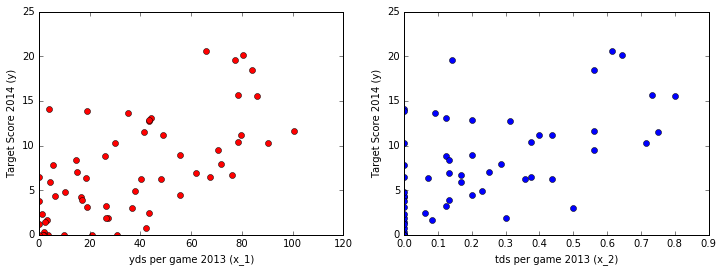

In [13]:
fig = plt.figure()
axes = fig.add_subplot(1,2,1)
fig.set_figwidth(fig.get_figwidth() * 2)

axes.plot(training_data[features[1]], training_data[features[0]], 'ro')
axes.set_xlabel(training_data.columns[1])
axes.set_ylabel(training_data.columns[0])

axes = fig.add_subplot(1,2,2)
axes.plot(training_data[features[2]], training_data[features[0]], 'bo')
axes.set_xlabel(training_data.columns[2])
axes.set_ylabel(training_data.columns[0])

plt.show()

y intercept is:  2.87230995784
Coefficients are:  [ 0.0806724  6.8793543]


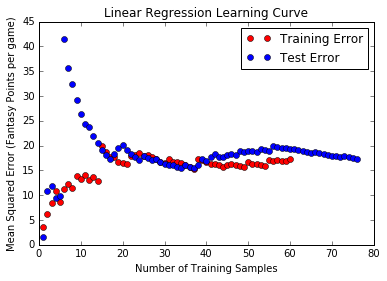

In [14]:
from sklearn.linear_model import LinearRegression
X = training_data[features[1:]]
y = training_data[features[0]]

lm = LinearRegression()
lm.fit(X,y)

# print intercept and coefficients
print "y intercept is: ", lm.intercept_
print "Coefficients are: ", lm.coef_

theta = [lm.intercept_, lm.coef_[0], lm.coef_[1]]

#initialize test data
features_14, test_data = get_data(2014, 2015)


def mean_squared_error(pred, actual, n):
    err_sum = 0.0
    for i in xrange(n):
        err_sum += (pred[i] - actual[i])**2
    return (1.0 / n) * err_sum

predicted_value = lambda x: theta[0] + theta[1]*x[0] + theta[2]*x[1]

fig = plt.figure()
axes = fig.add_subplot(1,1,1)

m_1 = training_data.shape[0]
m_2 = test_data.shape[0]
predicted_scores_14 = []
predicted_scores_15 = []
mse_errors_training = []
mse_errors_test = []

for rb in xrange(m_1):
    predicted_scores_14.append(predicted_value(training_data[features[1:]].iloc[rb].tolist()))
    mse_errors_training.append(mean_squared_error(predicted_scores_14, training_data[features[0]].iloc[:rb+1], rb+1))

for rb in xrange(m_2):
    predicted_scores_15.append(predicted_value(test_data[features_14[1:]].iloc[rb].tolist()))
    mse_errors_test.append(mean_squared_error(predicted_scores_15, test_data[features_14[0]].iloc[:rb+1], rb+1))


axes.plot(list(range(1,m_1+1)), mse_errors_training, 'ro', label="Training Error")
axes.plot(list(range(1,m_2+1)), mse_errors_test, 'bo', label="Test Error")
axes.set_ylabel("Mean Squared Error (Fantasy Points per game)")
axes.set_xlabel("Number of Training Samples")
axes.set_title("Linear Regression Learning Curve")
plt.legend()
plt.show()

### Evaluating Linear Regression

The prediction error above might not actually be the best metric as winning in fantasy football focuses more on relative performance between running backs. Perhaps it will be better to take numeric predictions and compare them with what actually happened in the season. 

In [22]:
from itable import *

col_headers = ["Linear Regression Rankings","Linear Regression Predicted Points", "Actual 2015 Rankings", "Actual 2015 Points"]
actual_rank = test_data[features_14[0]].sort_values(ascending=False)
predicted_rank = pandas.Series(predicted_scores_15, test_data.index)
predicted_rank = predicted_rank.sort_values(ascending=False)

data = numpy.column_stack((predicted_rank.index.tolist(), predicted_rank.tolist(), actual_rank.index.tolist(), actual_rank.tolist()))
ranks = pandas.DataFrame(data, columns=col_headers)

ranks.head(10)

pt = PrettyTable(ranks.head(10), tstyle=TableStyle(theme="theme1"), center=True, header_row=True)

cs = CellStyle()
cs.set("background-color", "green")
cs.set("color", "white")
pt.set_cell_style(style=cs,rows=[1,2,3,5], cols=[0])
pt
ranks.head(10)

,Linear Regression Rankings,Linear Regression Predicted Points,Actual 2015 Rankings,Actual 2015 Points
0,D.Murray,17.7643156843,D.Freeman,18.6933333333
1,A.Foster,14.8378932282,J.Charles,18.12
2,M.Ingram,13.6171048806,L.Bell,16.5333333333
3,L.Bell,13.1741788826,A.Foster,16.5
4,J.Forsett,12.6951868028,A.Peterson,15.35625
5,J.Charles,12.5878273089,M.Forte,14.8230769231
6,E.Lacy,12.4848096637,M.Ingram,14.75
7,J.Hill,12.4091793353,L.McCoy,13.5583333333
8,L.Miller,11.8531691468,D.Martin,13.4875
9,A.Morris,11.7271185995,D.Williams,13.3375


If we compare the above to ESPN preseason ranks, we find that our model was not too bad compared to experts but overall, the difficulty in predicting fantasy performace is apparent. 

1. Le'Veon Bell	PIT		
2. Adrian Peterson	MIN	
3. Eddie Lacy	GB	
4. Jamaal Charles	KC
5. Marshawn Lynch	SEA	
6. C.J. Anderson	DEN	
7. Matt Forte	CHI
8. DeMarco Murray	PHI	
9. LeSean McCoy	BUF
10. Jeremy Hill	CIN		

As seen with the expert ranks - few people predicted that Eddie Lacy, or Jeremy Hill or Demarco Murray would bust. Moreover, this model is flawed in that it only looks at data from the previous year to predict the next. Thus, since Adrian Peterson was out for almost all of 2014, our model didn't pick up on the fact that he should be in the top 10.

### Multiple Regression - Full Model

**Goal**: Lets now construct our full model using the same regression ideas as before but add features. We want to create fantasy projections QB's, WR's, RB's and TE's for week 12 of the season. Each of these players depend on different features. Here's what I'll consider:

| Quarterback | Running Back | Wide Receiver | Tight End | Defense (all) | Misc         
| :-: | :-: | :-: | :-: | :-: | :-: | :-:
|Passing Yards| Rushing Yards | # of Receptions | # of Receptions  | Passing Yards Allowed (QB) | Home/Away
|Passing Tds| Rushing Tds | Recieving Yards | Recieving Yards  | Rushing Yards Allowed (RB) | -
|Rushing Yards| Receiving Yards | Recieving Tds | Recieving Tds  | Receiving Yards Allowed (WR/TE) | -
|Rushing Tds| Receiving Tds | Fumbles | Fumbles  | Points Allowed (all) | -
|Interceptions| Fumbles | - | - | Sacks + Interceptions (QB) | -
|Fumbles| - | - | - | Fumbles Recovered (all) | -

Moreover, for all these features, we will be considering:
1. Previous Game total
2. Last 4 game average
3. Season Average

Defense features will only be season averages. This creates, for example a QB, $6*3 + 5 + 1 = 24$ feature fields. Lets write a function to prepare all this data.

In [16]:
from IPython.display import display

pandas.set_option('display.notebook_repr_html', True)

@lru_cache(200) # Define a cache with 200 empty slots
def get_games_range(year, start_week, target_week, home_team=None, away_team=None):
    g = nflgame.games(year,list(range(start_week,target_week)), home_team, away_team)
    return nflgame.combine_game_stats(g)

@lru_cache(200) # Define a cache with 200 empty slots
def get_plays_range(year, start_week, target_week):
    g = nflgame.games(year,list(range(start_week,target_week)))
    return nflgame.combine_plays(g)

def create_data_matrix(year, pos, target_week, feature_fields, defense_features):
    #Initialize players and their stat dictionary
    all_players = {}
    player_stats = {}
    feature_cols = []
    
    #get all players in the given season and their season stats
    season_players = get_games_range(year,1,target_week)
    for plr in season_players:
        if plr.player != None:
            if plr.player.position == pos:
                all_players[plr.playerid] = plr.name
                feature_stats = []
                for feature in feature_fields:
                    feature_stats.append(getattr(plr, feature)*1.0 / plr.games)
                    player_stats[plr.playerid] = feature_stats
    
    for f in feature_fields:
        feature_cols.append(f + " (season avg)")
    
    #get stats from prev 4 games
    prev_four = get_games_range(year, target_week-4, target_week)
    for plr in prev_four:
        if plr.player != None and plr.player.position == pos:
            if plr.playerid in player_stats:
                for f in feature_fields:
                    player_stats[plr.playerid].append(getattr(plr, f)*1.0 / plr.games)

    for f in feature_fields:
        feature_cols.append(f + " (prev four)")
        
    #get stats from previous game
    last_game = get_games_range(year, target_week-2, target_week)
    for plr in last_game:
        if plr.player != None and plr.player.position == pos:
            if plr.playerid in player_stats:
                for f in feature_fields:
                    player_stats[plr.playerid].append(getattr(plr, f)*1.0 / plr.games)
    for f in feature_fields:
        feature_cols.append(f + " (last game)")
    
    #Get Defensive stats
    team_defense_stats = {}
    nfl_teams = [tm[0] for tm in nflgame.teams]
    for tm in nfl_teams:
        if tm == 'JAC':
            tm = 'JAX'
        elif tm == 'STL':
            tm = 'LA'
        tm_games = get_games_range(year, 1, target_week, tm, tm)
        total_games_all_players = []
        for plr in tm_games:
            if plr.player != None: 
                if tm == 'JAX':
                    if plr.player.team == 'JAC':
                        total_games_all_players.append(plr.games)
                elif plr.player.team == tm:
                    total_games_all_players.append(plr.games)
        total_games = max(total_games_all_players)
        team_defense_stats[tm] = []
        for def_stat in defense_features[:2]:
            total_def_stat = 0.
            for plr in tm_games.filter(team__ne=tm):
                if getattr(plr, def_stat) > 0:
                    total_def_stat += getattr(plr, def_stat)*1.0
            team_defense_stats[tm].append(total_def_stat*1.0/total_games)
        for def_stat in defense_features[2:]:
            total_def_stat = 0.
            for plr in tm_games.filter(team=tm).defense():
                if getattr(plr, def_stat) > 0:
                    total_def_stat += getattr(plr, def_stat)*1.0
            team_defense_stats[tm].append(total_def_stat*1.0/total_games)
    
    #get what team each player will play and home/away stat
    target_week_games = nflgame.games(year, target_week)
    target_week_players = nflgame.combine(target_week_games)
    opponents = dict([(g.home, g.away) for g in target_week_games] + [(g.away, g.home) for g in target_week_games])
    target_scores = {}
    for ids in player_stats:
        if target_week_players.playerid(ids) != None:
            target_scores[ids] = score_player(target_week_players.playerid(ids))
        else:
            target_scores[ids] = 0.
    
    for plr in target_week_players:
        if plr.player != None and plr.player.position == pos:
                if plr.player.team == 'JAC':
                    opp_team = 'JAX'
                else:
                    opp_team = plr.player.team
                if plr.playerid in player_stats:
                    player_stats[plr.playerid].extend(team_defense_stats[opp_team])
    feature_cols.extend(defense_features)

    player_names = []
    target_data = []
    for key in player_stats:
        player_names.append(all_players[key])
        if len(player_stats[key]) == len(feature_fields)*3 + len(defense_features):
            target_data.append(target_scores[key])
    
    data_matrix = pandas.DataFrame(player_stats.values(), player_names, feature_cols)
    return target_data, data_matrix.dropna(0, 'any')

feature_fields_qb = ['passing_yds','passing_tds','rushing_yds', 'rushing_tds', 'passing_ints', 'fumbles_lost']
defense_features_qb = ['passing_yds', 'passing_tds', 'defense_sk', 'defense_int', 'defense_ffum']
target_data_qb, training_data_qb = create_data_matrix(2016, 'QB', 11, feature_fields_qb, defense_features_qb)
display(training_data_qb)   

feature_fields_rb = ['rushing_yds','rushing_tds','receiving_yds', 'receiving_tds', 'fumbles_lost']
defense_features_rb = ['rushing_yds', 'rushing_tds', 'defense_ffum']
target_data_rb, training_data_rb = create_data_matrix(2016, 'RB', 11, feature_fields_rb, defense_features_rb)
#display(training_data_rb)   

feature_fields_wr = ['receiving_rec', 'receiving_yds','receiving_tds', 'fumbles_lost']
defense_features_wr = ['passing_yds', 'passing_tds', 'defense_sk', 'defense_int', 'defense_ffum']
target_data_wr, training_data_wr = create_data_matrix(2016, 'WR', 11, feature_fields_wr, defense_features_wr)
#display(training_data_wr)   
#print target_data_wr

feature_fields_te = ['receiving_rec', 'receiving_yds','receiving_tds', 'fumbles_lost']
defense_features_te = ['passing_yds', 'passing_tds', 'defense_sk', 'defense_int', 'defense_ffum']
target_data_te, training_data_te = create_data_matrix(2016, 'TE', 11, feature_fields_te, defense_features_te)
#display(training_data_te)   


,passing_yds (season avg),passing_tds (season avg),rushing_yds (season avg),rushing_tds (season avg),passing_ints (season avg),fumbles_lost (season avg),passing_yds (prev four),passing_tds (prev four),rushing_yds (prev four),rushing_tds (prev four),...,passing_tds (last game),rushing_yds (last game),rushing_tds (last game),passing_ints (last game),fumbles_lost (last game),passing_yds,passing_tds,defense_sk,defense_int,defense_ffum
K.Cousins,301.777778,1.555556,5.222222,0.111111,0.777778,0.111111,340.333333,1.666667,5.666667,0.333333,...,2.0,-1.0,0.0,0.0,0.0,267.888889,1.111111,2.777778,0.666667,1.111111
A.Luck,285.000000,1.888889,24.888889,0.111111,0.777778,0.333333,281.333333,2.000000,30.666667,0.000000,...,1.0,15.0,0.0,2.0,0.0,298.666667,1.888889,1.888889,0.333333,1.000000
D.Carr,278.333333,1.888889,7.111111,0.000000,0.333333,0.222222,299.000000,1.666667,6.666667,0.000000,...,0.0,3.0,0.0,0.0,0.0,291.444444,1.888889,1.444444,0.888889,1.333333
T.Taylor,196.555556,1.111111,40.222222,0.444444,0.333333,0.111111,231.000000,0.666667,42.000000,1.000000,...,1.0,43.0,1.0,1.0,0.0,264.777778,1.111111,3.333333,0.666667,0.888889
J.Webb,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,290.666667,1.888889,3.000000,1.000000,0.777778
A.Rodgers,267.777778,2.444444,25.111111,0.333333,0.777778,0.333333,310.000000,3.000000,34.250000,0.250000,...,2.5,35.0,0.5,1.5,0.0,271.222222,2.111111,2.444444,0.777778,0.444444
C.Wentz,235.666667,1.000000,5.111111,0.000000,0.555556,0.222222,233.750000,0.500000,2.250000,0.000000,...,0.0,3.0,0.0,1.0,0.5,240.000000,1.444444,2.666667,1.000000,0.888889
S.Bradford,252.750000,1.375000,-0.250000,0.000000,0.250000,0.250000,258.000000,1.250000,-0.250000,0.000000,...,1.5,0.0,0.0,0.5,0.0,229.444444,1.111111,2.444444,1.111111,0.888889
C.Kessler,177.285714,0.857143,2.285714,0.000000,0.142857,0.142857,125.333333,0.666667,4.000000,0.000000,...,1.0,7.0,0.0,0.0,0.0,285.900000,2.500000,1.500000,0.800000,0.300000
A.Dalton,283.666667,1.111111,14.333333,0.222222,0.444444,0.111111,265.333333,1.333333,12.000000,0.333333,...,1.0,15.0,0.0,1.0,0.0,270.222222,2.111111,1.888889,1.000000,0.444444


We have now gathered all our data for the four positions. We now want to run linear regression on the training data and then use the coefficients we found to predict week 12 statistics. Thus, we also need fantasy scores for week 11 and 12 as well as feature data for week 12. 

In [17]:
def run_lin_reg(training_data, target_data, test_data):

    X = training_data
    y = target_data

    lm = LinearRegression()
    lm.fit(X,y)
    
    pred_data = numpy.column_stack([test_data.index.values, lm.predict(test_data)])
    #print lm.score(X,y)
    return pandas.DataFrame(data=pred_data)

#initialize test data
actual_data_qb, test_data_qb = create_data_matrix(2016, 'QB', 12, feature_fields_qb, defense_features_qb)
actual_data_rb, test_data_rb = create_data_matrix(2016, 'RB', 12, feature_fields_rb, defense_features_rb)
actual_data_wr, test_data_wr = create_data_matrix(2016, 'WR', 12, feature_fields_wr, defense_features_wr)
actual_data_te, test_data_te = create_data_matrix(2016, 'TE', 12, feature_fields_te, defense_features_te)

col_headers = ["QB Name", "Predicted Points","RB Name", "Predicted Points","WR Name", "Predicted Points","TE Name", "Predicted Points"]

predict_series_qb = run_lin_reg(training_data_qb, target_data_qb, test_data_qb).sort_values(1, ascending=False)
predict_series_qb = predict_series_qb.reset_index(drop=True)
predict_series_rb = run_lin_reg(training_data_rb, target_data_rb, test_data_rb).sort_values(1, ascending=False)
predict_series_rb = predict_series_rb.reset_index(drop=True)
predict_series_wr = run_lin_reg(training_data_wr, target_data_wr, test_data_wr).sort_values(1, ascending=False)
predict_series_wr = predict_series_wr.reset_index(drop=True)
predict_series_te = run_lin_reg(training_data_te, target_data_te, test_data_te).sort_values(1, ascending=False)
predict_series_te = predict_series_te.reset_index(drop=True)

full_rankings = pandas.concat([predict_series_qb,predict_series_rb,predict_series_wr,predict_series_te], axis=1)
full_rankings.columns = col_headers
print "Week 12 Predicted Rankings"
display(full_rankings)

actual_df_qb = pandas.DataFrame(data = numpy.column_stack([test_data_qb.index.values, actual_data_qb])).sort_values(1, ascending=False)
actual_df_qb = actual_df_qb.reset_index(drop=True)
actual_df_rb = pandas.DataFrame(data = numpy.column_stack([test_data_rb.index.values, actual_data_rb])).sort_values(1, ascending=False)
actual_df_rb = actual_df_rb.reset_index(drop=True)
actual_df_wr = pandas.DataFrame(data = numpy.column_stack([test_data_wr.index.values, actual_data_wr])).sort_values(1, ascending=False)
actual_df_wr = actual_df_wr.reset_index(drop=True)
actual_df_te = pandas.DataFrame(data = numpy.column_stack([test_data_te.index.values, actual_data_te])).sort_values(1, ascending=False)
actual_df_te = actual_df_te.reset_index(drop=True)

actual_rankings = pandas.concat([actual_df_qb,actual_df_rb,actual_df_wr,actual_df_te], axis=1)
col_headers_act = ["QB Name", "Actual Points","RB Name", "Actual Points","WR Name", "Actual Points","TE Name", "Actual Points"]
actual_rankings.columns = col_headers_act
display(actual_rankings)

Week 12 Predicted Rankings


,QB Name,Predicted Points,RB Name,Predicted Points,WR Name,Predicted Points,TE Name,Predicted Points
0,E.Manning,40.0683,D.Johnson,32.7305,D.Baldwin,15.6217,J.Cook,35.9936
1,M.Mariota,39.873,L.Bell,27.3458,S.Smith,14.2132,L.Kendricks,19.4362
2,A.Rodgers,35.846,E.Elliott,20.6976,A.Cooper,14.0731,J.Graham,17.2818
3,T.Brady,34.751,M.Forte,19.0794,J.Edelman,13.5605,V.McDonald,16.095
4,R.Wilson,34.6521,D.Murray,18.2161,Ty.Williams,13.2911,J.Witten,14.935
5,K.Cousins,31.1303,J.Starks,18.1417,T.Hilton,13.0885,G.Celek,14.5772
6,C.Palmer,27.5798,L.Miller,17.3965,D.Bryant,12.9851,T.Kelce,13.972
7,M.Ryan,26.3067,M.Gordon,17.3203,A.Brown,12.519,T.Eifert,13.8268
8,D.Prescott,25.8861,D.Freeman,16.8855,J.Crowder,12.3432,H.Henry,10.9783
9,C.Kaepernick,25.0592,R.Jennings,16.2555,J.Landry,12.2713,C.Fiedorowicz,10.5625


,QB Name,Actual Points,RB Name,Actual Points,WR Name,Actual Points,TE Name,Actual Points
0,C.Kaepernick,33.1,M.Ingram,29.2,A.Brown,29.6,J.Reed,26.5
1,D.Brees,32.5,L.McCoy,28.4,T.Hill,28,T.Eifert,15.3
2,K.Cousins,30.2,D.Johnson,26.1,M.Thomas,27.3,T.Kelce,14.1
3,T.Siemian,29,E.Elliott,25,M.Evans,26.4,D.Sims,13.3
4,R.Tannehill,26.8,L.Bell,22.2,D.Adams,25.8,L.Kendricks,13.1
5,A.Rodgers,23.1,J.Stewart,21.6,E.Sanders,25.7,D.Walker,12.5
6,D.Prescott,21.7,D.Freeman,20.7,O.Beckham,24.6,J.Gresham,12
7,M.Mariota,21.6,C.Hyde,18,T.Gabriel,24.2,C.Walford,11.8
8,B.Bortles,21.1,T.Hightower,17.5,M.Wilson,22.5,K.Rudolph,10.9
9,B.Roethlisberger,20.8,L.Murray,16.3,D.Inman,20.9,V.Davis,9.3


We did it! We created rankings for week 12 training on season data and coming up with linear regression coefficients to predict future fantasy score. However, we can see some major discrepancies in these predictions as some of thse are pretty bold. Jared Cook's 35 point projection is staggering and can't be reasonable. Perhaps there is something wrong in the data processing but while qb and rb ranks seem reasonable, wr and te rankings are pretty bold. Nevertheless - this introduces is to one of the techniques to get started analyzing football data and predicting player performance.

## Optional Topic - Daily Fantasy and the Optimization Problem

We have created tiers, rankings and projections for players and seen how different methods of going about this problem. In recent years, the emergence of daily fantasy has presented an interesting problem for us to look at. 

**What is daily fantasy football?**
Daily fantasy is just like the problem we've been looking at in terms of scoring but here, we have no preset team we draft. Each week is like a new season and you pick your players against a salary cap.

More specifically, in FanDuel, you have 60,000 dollars to spend on players, each of whom are given a dollar amount you must pay to roster them. You cannot go over the salary cap.

Thus, the problem here is minimizing cost and maximizing output. We can use our projections that we made to tackle this optimization problem.

Lets look at two approaches to tackling this knapsack problem:

### Objective Function

Maximize Points per game:

$$\text{total points} = \sum^9_1 {\text{Position Player Points}}$$

Constraints

$$\sum^9_1 \text{Salary of Players} <= \text{Salaray Cap}$$

Where $WR1 \neq WR2 \neq WR3$ and $RB1 \neq RB2$

### A Greedy Approach

We can prioritize each player by points per dollar and select players in that order as long as we get a valid team and don't violate the salary cap.

In [18]:
salary_url = 'FD-Salaries.csv'
salaries = pandas.read_csv(salary_url)

all_player_pred = {}
plr_pos = ["QB", "RB", "WR", "TE"]
idx = 1
for p in plr_pos:
    count = 0
    for plr in full_rankings[p + " Name"]:
        if pandas.isnull(plr):
            break
        all_player_pred[plr] = [p, full_rankings.iloc[count, idx]]
        count += 1
    idx += 2

def get_position(plr):
    return all_player_pred[plr][0]

def get_points(plr):
    return all_player_pred[plr][1]

def get_value(plr):
    return all_player_pred[plr][1]*1.0 / get_salary(plr)

def get_salary(player_name):
    if len(salaries["Name"][salaries["Name"]==player_name].index) == 0:
        return 99999
    else:
        idx = salaries["Name"][salaries["Name"]==player_name].index[0]
        return salaries["FD salary"].iloc[idx]

def greedy_knapsack(players):
    budget = 50000
    current_team_salary = 0
    constraints = {
        'QB':1,
        'RB':2,
        'WR':2,
        'TE':1,
        'FLEX':1
        }
    
    counts = {
        'QB':0,
        'RB':0,
        'WR':0,
        'TE':0,
        'FLEX':0
        }
    
    players.sort(key=lambda x: get_value(x), reverse=True)
    #print players
    team = []
    for plr in players:
        pos = get_position(plr)
        pred_pts = get_points(plr)
        sal = get_salary(plr)
        if counts[pos]<constraints[pos] and current_team_salary+sal <= budget:
            team.append(plr)
            counts[pos] = counts[pos] + 1
            current_team_salary += sal
            continue
        if counts['FLEX'] < constraints['FLEX'] and current_team_salary + sal <= budget and pos in ['RB','WR','TE']:
            team.append(plr)
            counts['FLEX'] = counts['FLEX'] + 1
            current_team_salary += sal
            
    players.sort(key=lambda x: get_points(x), reverse=True)
    for player in players:
        pos = get_position(player)
        sal = get_salary(player)
        pts = get_points(player)
        if player not in team:
            pos_players = [ x for x in team if get_position(x) == pos]
            pos_players.sort(key=lambda x: get_points(x))
            for pos_player in pos_players:
                if (current_team_salary + sal - get_salary(pos_player)) <= budget and pts > get_points(pos_player):
                    team[team.index(pos_player)] = player
                    current_team_salary = current_team_salary + sal - get_salary(pos_player)
                    break
    return team

team = greedy_knapsack(all_player_pred.keys())
points = 0
salary = 0
for player in team:
    points += get_points(player)
    salary += get_salary(player)
    print player, get_position(player), get_points(player), get_salary(player)
print "\nPoints: {}".format(points)
print "Salary: {}".format(salary)

E.Manning QB 40.0682736214 7800.0
M.Forte RB 19.0794463053 6800.0
J.Cook TE 35.9935937419 4600.0
L.Bell RB 27.3457800584 9500.0
E.Elliott RB 20.6975688005 8600.0
S.Smith WR 14.2131942762 6300.0
J.Edelman WR 13.5604756442 6400.0

Points: 170.958332448
Salary: 50000.0


## Genetic Algorithm 

**Intro** - A genetic algorithm maintains a population of candidate solutions at hand and makes it evolve by iteratively applying a set of stochastic operators.

**Algorithm**

1. Produce a random population
2. Evaluate fitness of all individuals
3. While termination condiition not met
    - select fitter indivuals for reproduction
    - recombine between individuals
    - mutate individuals
    - evalutae fitness of the modified individuals
    - generate new population
    
In terms of fantasy teams - each individual is a prospective team. 

**List of functions**

1. Create population of random teams
2. Fitness
    - Simple fitness function - returns the expected point total based on projections
    - return 0 is over budget
3. Cross-Over
    - Breeding - take some of the strogest teams and cross them over to create new teams
4. Mutation
    - Randomly shake up teams so we don't get stuck at a local maximum
5. Evolution
    - Initially, create random population and then breed together strogest teams.
    - Discard weaker teams and create some more random teams. and mutate some teams 

In [19]:
import random
import math
from operator import add

def CreateRandomTeam():
    team = {
    'qb' : random.sample(qbs,1),
    'rb' : random.sample(rbs,2),
    'wr' : random.sample(wrs,3),
    'te' : random.sample(tes,1),
    'flex' : random.sample(flexs,1)
    }
    
    while True:
        flexer = team['flex'][0]
        if flexer in team['rb'] or flexer in team['wr'] or flexer in team['te']:
            team['flex'] = random.sample(flexs,1)
        else:
            break
    
    return team


def GetTeamPointTotal(team):
    total_points = 0
    for pos, players in team.iteritems():
        for player in players:
            total_points += get_points(player)
    return total_points

def GetTeamSalary(team):
    total_salary = 0
    for pos, players in team.iteritems():
        for player in players:
            total_salary += get_salary(player)
    return total_salary

def printTeam(team):
    print team['qb'][0]
    print team['rb'][0]
    print team['rb'][1]
    print team['wr'][0]
    print team['wr'][1]
    print team['wr'][2]
    print team['te'][0]
    print team['flex'][0]

def CreatePopulation(count):
    print "Populating"
    return [CreateRandomTeam() for i in range(0,count)]

qbs = []
rbs = []
wrs = []
tes = []
flexs = []

for player in all_player_pred.keys():
    pos = get_position(player)
    if pos == 'QB':
        qbs.append(player)
    if pos == 'RB':
        rbs.append(player)
    if pos == 'WR':
        wrs.append(player)
    if pos == 'TE':
        tes.append(player)
    if pos != 'QB':
        flexs.append(player)
        
def fitness(team):
    points = GetTeamPointTotal(team)
    salary = GetTeamSalary(team)
    values = team.values()
    if salary > 50000:
        return 0
    return points


def grade(pop):
    #print "grading"
    'Find average fitness for a population.'
    summed = reduce(add, (fitness(team) for team in pop))
    return summed / (len(pop) * 1.0)

def listToTeam(players):
    return {
    'qb' : [players[0]],
    'rb' : players[1:3],
    'wr' : players[3:6],
    'te' : [players[6]],
    'flex' : [players[7]],
}


def breed(mother, father):
    positions = ['qb','rb','wr','te','flex']
    
    mother_lists = [mother['qb'] + mother['rb'] + mother['wr'] + mother['te'] + mother['flex']]
    mother_list = [item for sublist in mother_lists for item in sublist]
    father_lists = [father['qb'] + father['rb'] + father['wr'] + father['te'] + father['flex']]
    father_list = [item for sublist in father_lists for item in sublist]

    index = random.choice([1,3,6,7])
    child1 = listToTeam(mother_list[0:index] + father_list[index:])
    child2 = listToTeam(father_list[0:index] + mother_list[index:])
    
    while True:
        flexer = child1['flex'][0]
        if flexer in child1['rb'] or flexer in child1['wr'] or flexer in child1['te']:
            child1['flex'] = random.sample(flexs,1)
        else:
            break
            
    while True:
        flexer = child2['flex'][0]
        if flexer in child2['rb'] or flexer in child2['wr'] or flexer in child2['te']:
            child2['flex'] = random.sample(flexs,1)
        else:
            break
        
    return[child1, child2]  

def mutate(team):
    #print "Mutating"
    positions = ['qb','rb','wr','te','flex']
      
    random_pos = random.choice(positions)
    if random_pos == 'qb':
        team['qb'][0] = random.choice(qbs)
    if random_pos == 'rb':
        team['rb'] = random.sample(rbs,2)
    if random_pos == 'wr':
        team['wr'] = random.sample(wrs,3)
    if random_pos == 'te':
        team['te'][0] = random.choice(tes)
    if random_pos == 'flex':
        team['flex'][0] = random.choice(flexs)
        
    while True:
        flexer = team['flex'][0]
        if flexer in team['rb'] or flexer in team['wr'] or flexer in team['te']:
            team['flex'] = random.sample(flexs,1)
        else:
            break
    return team

def evolve(pop, retain=0.35, random_select=0.05, mutate_chance=0.005):
    #print "Evolving"
    graded = [ (fitness(team), team) for team in pop]
    graded = [ x[1] for x in sorted(graded, reverse=True)]
    retain_length = int(len(graded)*retain)
    parents = graded[:retain_length]

    # randomly add other individuals to promote genetic diversity
    for individual in graded[retain_length:]:
        if random_select > random.random():
            parents.append(individual)

    # mutate some individuals
    for individual in parents:
        if mutate_chance > random.random():
            individual = mutate(individual)

    # crossover parents to create children
    parents_length = len(parents)
    desired_length = len(pop) - parents_length
    children = []
    while len(children) < desired_length:
        male = random.randint(0, parents_length-1)
        female = random.randint(0, parents_length-1)
        if male != female:
            male = parents[male]
            female = parents[female]
            babies = breed(male,female)
            for baby in babies:
                children.append(baby)
    parents.extend(children)
    return parents

best_teams=[]
history = []
p = CreatePopulation(1000)
fitness_history = [grade(p)]
for i in xrange(2):
    #print "Iteration Number: ", i
    p = evolve(p)
    fitness_history.append(grade(p))
    valid_teams = [ team for team in p if GetTeamSalary(team) <= 50000]
    valid_teams = sorted(valid_teams, key=GetTeamPointTotal, reverse=True)
    if len(valid_teams) > 0:
        best_teams.append(valid_teams[0])
for datum in fitness_history:
    history.append(datum)

best_teams = sorted(best_teams, key=GetTeamSalary, reverse=True)
choice = best_teams[0]
printTeam(choice)
print GetTeamSalary(choice)
print GetTeamPointTotal(choice)

Populating
R.Wilson
D.Murray
L.Murray
L.Whitehead
S.Shepard
M.Wilson
J.Cook
D.Baldwin
48900.0
137.035634993
